In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Phishing Data - Phishing Data.csv")
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [3]:
data.shape

(2456, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
having_IP_Address              2456 non-null int64
URL_Length                     2456 non-null int64
Shortining_Service             2456 non-null int64
having_At_Symbol               2456 non-null int64
double_slash_redirecting       2456 non-null int64
Prefix_Suffix                  2456 non-null int64
having_Sub_Domain              2456 non-null int64
SSLfinal_State                 2456 non-null int64
Domain_registeration_length    2456 non-null int64
Favicon                        2456 non-null int64
port                           2456 non-null int64
HTTPS_token                    2456 non-null int64
Request_URL                    2456 non-null int64
URL_of_Anchor                  2456 non-null int64
Links_in_tags                  2456 non-null int64
SFH                            2456 non-null int64
Submitting_to_email            2456 non-null int64
Abnormal_URL              

In [5]:
X = data.drop(['Result'],axis=1)
Y = data['Result']

In [6]:
print("X has shape: ",X.shape)
print("Target Y has shape: ",Y.shape)

X has shape:  (2456, 30)
Target Y has shape:  (2456,)


In [7]:
Y.unique()

array([1, 0], dtype=int64)

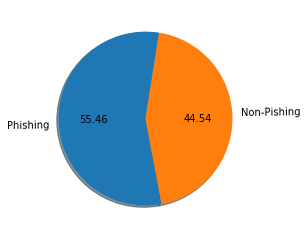

In [8]:
Balence = Y.value_counts()
plt.pie(Balence,labels=['Phishing','Non-Pishing'],autopct='%.2f',shadow = True, radius = 1,rotatelabels=True, startangle=81)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size= .3, random_state=41)

# LOGISTIC

In [11]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr = lr.predict(xtest)
accuracy_score(ytest,ypred_lr)

C:\Users\Sudhin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9362279511533242

In [12]:
f1_score(ytest,ypred_lr)

0.9255150554675119

In [13]:
confusion_matrix(ytest,ypred_lr)

array([[398,  27],
       [ 20, 292]], dtype=int64)

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
ypred_gnb = gnb.predict(xtest)
accuracy_score(ytest,ypred_gnb)

0.9090909090909091

In [17]:
f1_score(ytest,ypred_gnb)

0.895800933125972

In [18]:
confusion_matrix(ytest,ypred_gnb)

array([[382,  43],
       [ 24, 288]], dtype=int64)

# Support Vector Classifier

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(kernel='sigmoid')
svc.fit(xtrain,ytrain)
ypred_svc = svc.predict(xtest)
accuracy_score(ytest,ypred_svc)

C:\Users\Sudhin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9335142469470827

In [21]:
f1_score(ytest,ypred_svc)

0.9220985691573927

In [22]:
confusion_matrix(ytest,ypred_svc)

array([[398,  27],
       [ 22, 290]], dtype=int64)

In [23]:
svc = SVC(kernel='rbf')
svc.fit(xtrain,ytrain)
ypred_svc1 = svc.predict(xtest)
accuracy_score(ytest,ypred_svc1)

C:\Users\Sudhin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9430122116689281

In [24]:
f1_score(ytest,ypred_svc1)

0.9326923076923077

In [25]:
confusion_matrix(ytest,ypred_svc1)

array([[404,  21],
       [ 21, 291]], dtype=int64)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier

In [27]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred_dt = dt.predict(xtest)
accuracy_score(ytest,ypred_dt)

0.9579375848032564

In [28]:
f1_score(ytest,ypred_dt)

0.9510268562401263

In [29]:
confusion_matrix(ytest,ypred_dt)

array([[405,  20],
       [ 11, 301]], dtype=int64)

In [30]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred_dt1 = dt.predict(xtest)
accuracy_score(ytest,ypred_dt1)

0.9538670284938942

In [31]:
f1_score(ytest,ypred_dt1)

0.9463722397476341

In [32]:
confusion_matrix(ytest,ypred_dt1)

array([[403,  22],
       [ 12, 300]], dtype=int64)

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)
accuracy_score(ytest,ypred_rf)

0.9701492537313433

In [83]:
rf.score(xtrain,ytrain)

0.9959278650378127

In [77]:
f1_score(ytest,ypred_rf)

0.9648562300319489

In [78]:
confusion_matrix(ytest,ypred_rf)

array([[413,  12],
       [ 10, 302]], dtype=int64)

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred_knn = knn.predict(xtest)
    print('Accuracy score with {} neighbours is:'.format(i) , accuracy_score(ytest,ypred_knn))

Accuracy score with 2 neighbours is: 0.9457259158751696
Accuracy score with 3 neighbours is: 0.9416553595658074
Accuracy score with 4 neighbours is: 0.9416553595658074
Accuracy score with 5 neighbours is: 0.9402985074626866
Accuracy score with 6 neighbours is: 0.9389416553595658
Accuracy score with 7 neighbours is: 0.9402985074626866
Accuracy score with 8 neighbours is: 0.9457259158751696
Accuracy score with 9 neighbours is: 0.9430122116689281
Accuracy score with 10 neighbours is: 0.9402985074626866
Accuracy score with 11 neighbours is: 0.9335142469470827
Accuracy score with 12 neighbours is: 0.9335142469470827
Accuracy score with 13 neighbours is: 0.9335142469470827
Accuracy score with 14 neighbours is: 0.9335142469470827


In [40]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred_knn = knn.predict(xtest)
accuracy_score(ytest,ypred_knn)

0.9457259158751696

In [59]:
f1_score(ytest,ypred_knn)

0.9335548172757476

In [79]:
table = {'Models':['Logistic','Svm(sigmoid_kernal)','Svm(rbf_kernal)','Decision Tree','Random Forest Classifier','KNN'],
        'Accuracy Score':[0.936 ,0.934,0.943,0.958,0.970, 0.946],
       'F1 score' : [0.926,0.934,0.943,0.951,0.965,0.934]}

In [80]:
Table = pd.DataFrame(table)

In [81]:
Table

,Models,Accuracy Score,F1 score
0,Logistic,0.936,0.926
1,Svm(sigmoid_kernal),0.934,0.934
2,Svm(rbf_kernal),0.943,0.943
3,Decision Tree,0.958,0.951
4,Random Forest Classifier,0.970,0.965
5,KNN,0.946,0.934


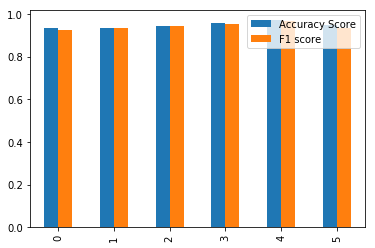

In [82]:
Table.plot(kind="bar", )